# Logistic Regression

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from ml import *

In [2]:
param_grid = [
        {'solver': ['sgd', 'adam'], 'activation': ['tanh', 'relu'],
         'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'learning_rate_init': [0.001, 0.01, 0.1],
         'max_iter': [200, 300, 400]},
        {'solver': ['lbfgs'], 'activation': ['tanh', 'relu'],
         'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'max_iter': [200, 300, 400]}
    ] 

## Wine Quality Dataset

In [3]:
# Preprocess dataset
wineDF = pd.read_csv("./data/winequality-red.csv")

wineDF['label'] = wineDF['quality'].apply(lambda x: 'good' if x > 6 else 'bad')
wineDF.drop('quality', axis=1)

wine_y = wineDF['label'].values
wine_x = wineDF.drop('label', axis=1).values

In [4]:
# Standardize dataset
scaler = StandardScaler()
wine_x = scaler.fit_transform(wine_x)

Split 1:

- Model parameters:
  - max_iter: 200
  - solver: adam
  - hidden_layer_sizes: (50,)
  - learning_rate_init: 0.001
  - activation: tanh

- Metrics:
              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       277
        good       1.00      1.00      1.00        43

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320


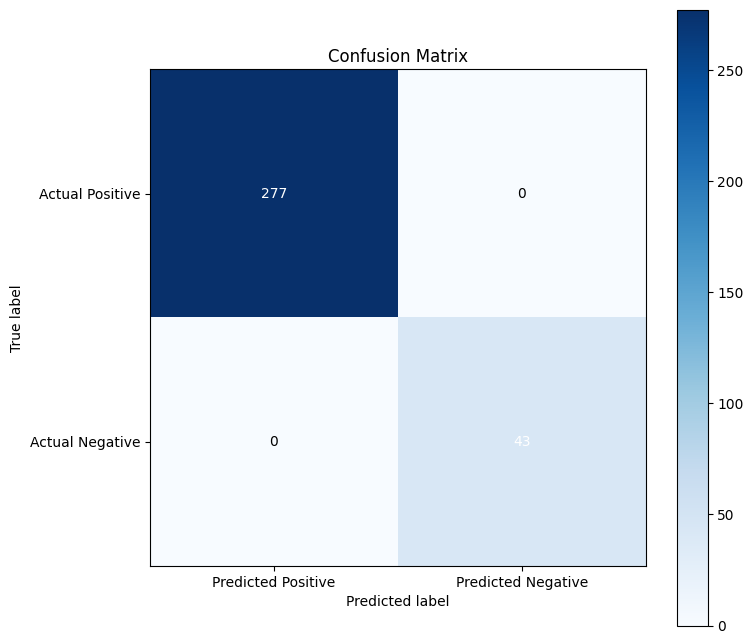

Split 2:

- Model parameters:
  - max_iter: 200
  - solver: adam
  - hidden_layer_sizes: (50,)
  - learning_rate_init: 0.001
  - activation: tanh

- Metrics:
              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       277
        good       1.00      1.00      1.00        43

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320


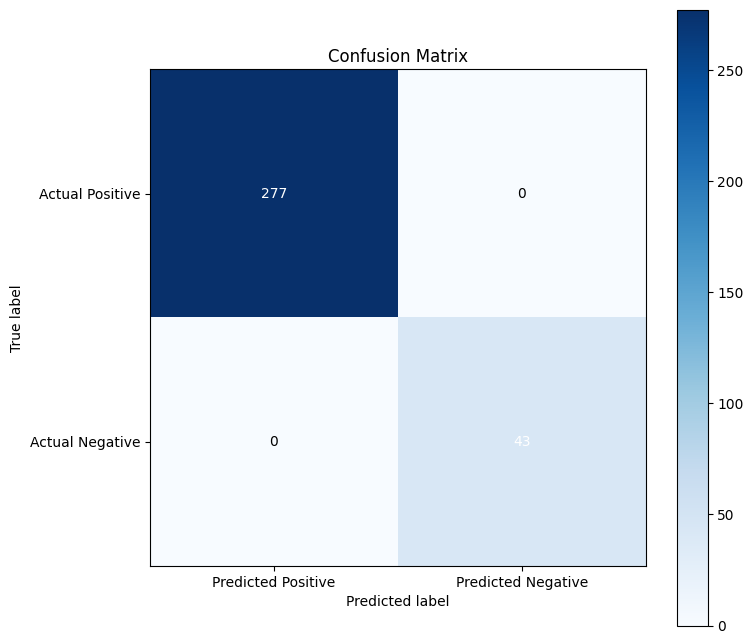

Split 3:


In [ ]:
# Cross validate
all_metrics = []

for i in range(5):
    print(f"Split {i+1}:")
    
    x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.2, stratify=wine_y)
    
    model = build_nn_model(x_train, y_train, param_grid)

    filtered_params = filter_params(model.get_params(), param_grid)
    
    print("\n- Model parameters:")
    for param, value in filtered_params.items():
        print(f"  - {param}: {value}")
    
    metrics, report, cm = fit_and_predict(model, x_train, x_test, y_train, y_test)
    
    all_metrics.append(metrics)
    print("\n- Metrics:")
    print(report)
    plot_confusion_matrix(cm, plt.cm.Blues)
    
print("\nAverage metrics:")
print_avg_metrics(all_metrics)

## Heart Disease Dataset

In [ ]:
# Preprocess dataset
heartDF = pd.read_csv("./data/heart_statlog_cleveland_hungary_final.csv")

heartDF['target'] = heartDF['target'].apply(lambda x: 'heart disease' if x else 'normal')
heart_y = heartDF['target'].values
heart_x = heartDF.drop('target', axis=1).values

In [ ]:
# Standardize dataset
scaler = StandardScaler()
heart_x = scaler.fit_transform(heart_x)

In [ ]:
# Cross validate
all_metrics = []

for i in range(5):
    print(f"Split {i+1}:")
    
    x_train, x_test, y_train, y_test = train_test_split(heart_x, heart_y, test_size=0.2, stratify=heart_y)
    
    model = build_nn_model(x_train, y_train, param_grid)

    filtered_params = filter_params(model.get_params(), param_grid)
    
    print("\n- Model parameters:")
    for param, value in filtered_params.items():
        print(f"  - {param}: {value}")
    
    metrics, report, cm = fit_and_predict(model, x_train, x_test, y_train, y_test)
    
    all_metrics.append(metrics)
    print(report)
    plot_confusion_matrix(cm, plt.cm.Oranges)
    
print("\nAverage metrics:")
print_avg_metrics(all_metrics)